In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Comment this lines if you have this stuff already installed
#!(yes |pip install geopandas)
#!(yes |pip install descartes)
#!(yes |conda install -c conda-forge geoplot)
#!(yes | pip install plotly)
import plotly.express as px

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

/home/ignacio/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Getting the data for location-keyword relationshp analysis
twitterCleanData = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
twitterKeywordAndLocation = twitterCleanData[['keyword', 'location']]
#Filtering those values that are missing
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['keyword'] != 'unknown']
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['location'] != 'unknown']
twitterKeywordAndLocation.head()

keyword    location
0  earthquake          us
1        fire          la
3  evacuation  california
4       smoke      alaska
5        fire  california

In [3]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   5931 non-null   object
 1   location  5931 non-null   object
dtypes: object(2)
memory usage: 139.0+ KB


In [4]:
#Changing DataFrame columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [5]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

keyword    location  counter
0         earthquake          us        1
1               fire          la        1
3         evacuation  california        1
4              smoke      alaska        1
5               fire  california        1
...              ...         ...      ...
7603      quarantine     alabama        1
7606  suicide bomber       world        1
7607         tornado    oklahoma        1
7609      wild fires  california        1
7612        wildfire  california        1

[5931 rows x 3 columns]

In [6]:
#Number of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location')\
.agg({'counter' : 'sum'})
keywordsPerLocation = keywordsPerLocation.reset_index()
keywordsPerLocation

location  counter
0               #1 vacation destination,hawaii        1
1                                   #937??#734        1
2                                #????? libya#        1
3                            #blacklivesmatter        1
4                                 #bossnation!        1
...                                        ...      ...
3326                 ìït: 42.910975,-78.865828        1
3327                  ìït: 43.631838,-79.55807        1
3328                       ìït: 6.4682,3.18287        1
3329  ìït: 6.488400524109015,3.352798039832285        1
3330             ìøåàå_t: 40.736324,-73.990062        1

[3331 rows x 2 columns]

In [7]:
#Cleaning the data
#Dropping those locations that don't have a significant number of keywords
#For that, first we see the average
keywordMean = keywordsPerLocation['counter'].mean()
keywordMean = int(keywordMean)
keywordMean

1

In [8]:
#Then, we filter
keywordsPerLocation = keywordsPerLocation[keywordsPerLocation['counter'] > keywordMean]
keywordsPerLocation.describe()

counter
count               644.00
mean                  5.04
std                   8.09
min                   2.00
25%                   2.00
50%                   3.00
75%                   5.00
max                 111.00

In [9]:
top20KeywordsPerLocation = keywordsPerLocation.nlargest(20, 'counter')
top20KeywordsPerLocation

location  counter
3021              usa      111
2011         new york       80
589        california       64
1676           london       55
2996    united states       53
3016               us       44
3232            world       41
1398            india       38
605            canada       35
2048          nigeria       35
2981               uk       34
3238        worldwide       32
1704  los angeles, ca       28
1462            japan       26
1920           mumbai       26
1011       everywhere       22
358         australia       21
1525            kenya       21
3128   washington, dc       21
684       chicago, il       20

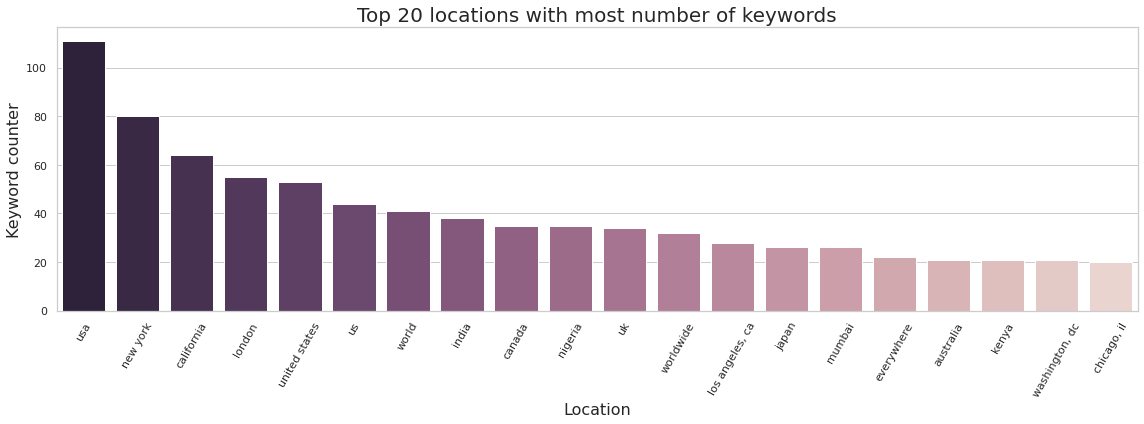

In [10]:
#barplot

ax = sns.barplot(x = 'location', y = 'counter', data = top20KeywordsPerLocation,\
                palette = sns.cubehelix_palette(20, reverse = True))
ax.set_ylabel('Keyword counter', size = 16)
ax.set_xlabel('Location', size = 16)
ax.set_title('Top 20 locations with most number of keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20LocationsWithMosthKeywords.png")

In [11]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword')\
.agg({'counter' : 'sum'})
keywordsPopular = keywordsPopular.reset_index()

In [12]:
#Removing non representative samples
keywordsPopularMean = keywordsPopular.mean()
keywordsPopularMean = int(keywordsPopularMean)
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > keywordsPopularMean]
keywordsPopular.describe()

counter
count               132.00
mean                 30.22
std                   2.49
min                  27.00
25%                  28.00
50%                  30.00
75%                  32.00
max                  37.00

In [13]:
top20KeywordsPopular = keywordsPopular.nlargest(20, 'counter')

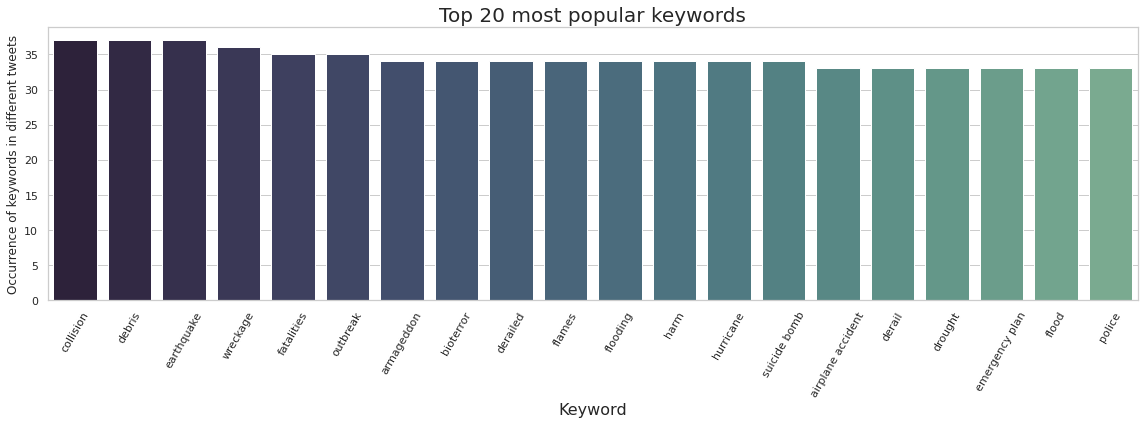

In [14]:
#barplot

ax = sns.barplot(x = 'keyword', y = 'counter', data = top20KeywordsPopular,\
                palette = sns.cubehelix_palette(30, start=.5, rot = -.75, reverse = True))
ax.set_ylabel('Occurrence of keywords in different tweets', size = 12)
ax.set_xlabel('Keyword', size = 16)
ax.set_title('Top 20 most popular keywords', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top20MostPopularKeywords.png", optimize = True)

In [15]:
#Comparison between the most popular keywords and locations associated to those keywords
locationAndKeyword = pd.merge(twitterKeywordAndLocation, keywordsPopular, on = 'keyword')
locationAndKeyword.head()

keyword   location  counter_x  counter_y
0  earthquake         us          1         37
1  earthquake  argentina          1         37
2  earthquake      earth          1         37
3  earthquake     vashon          1         37
4  earthquake     sydney          1         37

In [16]:
locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1, inplace = True)
locationAndKeyword['counter'] = 1
locationAndKeyword.head()

keyword   location  counter
0  earthquake         us        1
1  earthquake  argentina        1
2  earthquake      earth        1
3  earthquake     vashon        1
4  earthquake     sydney        1

In [17]:
locationAndKeyword = locationAndKeyword.groupby(['keyword', 'location'])\
.agg({'counter' : 'sum'})
locationAndKeyword = locationAndKeyword.sort_values(by = 'counter', ascending = False)
locationAndKeyword = locationAndKeyword.reset_index()
locationAndKeyword

keyword                     location  counter
0         razed                   california       23
1     sandstorm                          usa       17
2     loud bang                        kenya       16
3         flood                     new york       13
4      arsonist                           ss       10
...         ...                          ...      ...
3462  displaced                mechanicsburg        1
3463  displaced  na:tinixw / hoopa, berkeley        1
3464  displaced                new york city        1
3465  displaced               north carolina        1
3466   wreckage                 xi'an, china        1

[3467 rows x 3 columns]

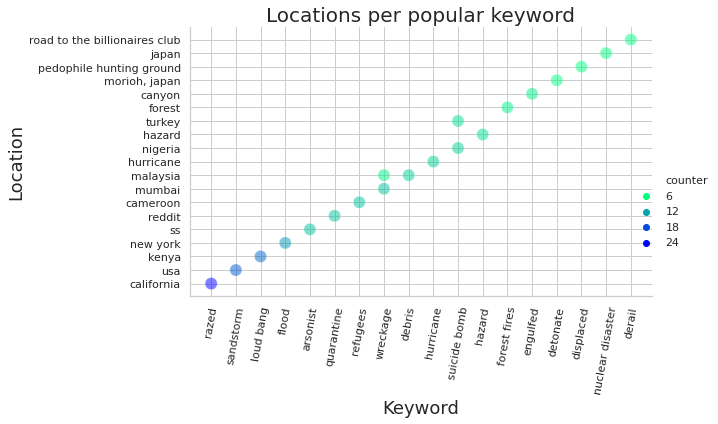

In [18]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'counter',\
            s = 150, alpha = .5, height = 5, data = locationAndKeyword.head(20),\
               palette = "winter_r")

g.ax.set_title('Locations per popular keyword', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 18)
g.set_ylabels('Location', fontsize = 18)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation = 80)
g.ax.figure.set_size_inches(10, 6)
plt.tight_layout()
g.ax.get_figure().savefig("LocationPeroPopularKeyword.png")

In [19]:
#Starting the analisis for the relation between keywords and veracuty
#Getting the data 
twitterCleanData = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
twitterKeywordAndTarget = twitterCleanData[['keyword', 'target']]
#Filtering those values that are missing
twitterKeywordAndTarget = twitterKeywordAndTarget[twitterKeywordAndTarget['keyword'] != 'unknown']
twitterKeywordAndTarget['keyword'] = twitterKeywordAndTarget['keyword'].astype('string')
twitterKeywordAndTarget.head()

keyword  target
0  earthquake       1
1        fire       1
2  evacuation       1
3  evacuation       1
4       smoke       1

In [20]:
#Veracity per keyword
veracityPerKeyword = twitterKeywordAndTarget.groupby('keyword')\
.agg({'target' : ['sum', 'count']})
veracityPerKeyword.columns = ['target_count','target_sum']
veracityPerKeyword.head()

target_count  target_sum
keyword                                    
ablaze                       13          36
accident                     24          35
aftershock                    0          34
airplane accident            30          35
ambulance                    20          38

In [21]:
#Removing non representative samples
veracityPerKeywordMean = veracityPerKeyword[('target_count')].mean()
veracityPerKeywordMean = int(veracityPerKeywordMean)
veracityPerKeyword = veracityPerKeyword[veracityPerKeyword[('target_count')] > veracityPerKeywordMean]
veracityPerKeyword.describe()

target_count           target_sum
count               102.00               102.00
mean                 23.97                35.34
std                   6.17                 3.62
min                  15.00                19.00
25%                  19.00                33.25
50%                  24.00                35.00
75%                  27.75                38.00
max                  39.00                45.00

In [22]:
veracityPerKeyword['veracity'] = (veracityPerKeyword['target_count'] / veracityPerKeyword['target_sum']) * 100
veracityPerKeyword.drop(columns = ['target_count', 'target_sum'], inplace=True)
veracityPerKeyword.head()

veracity
keyword                               
accident                         68.57
airplane accident                85.71
ambulance                        52.63
arson                            68.75
attack                           70.27

In [23]:
veracityPerKeyword = veracityPerKeyword.reset_index()

In [24]:
top10KeywordsInRealTweets = veracityPerKeyword.nlargest(10, 'veracity')

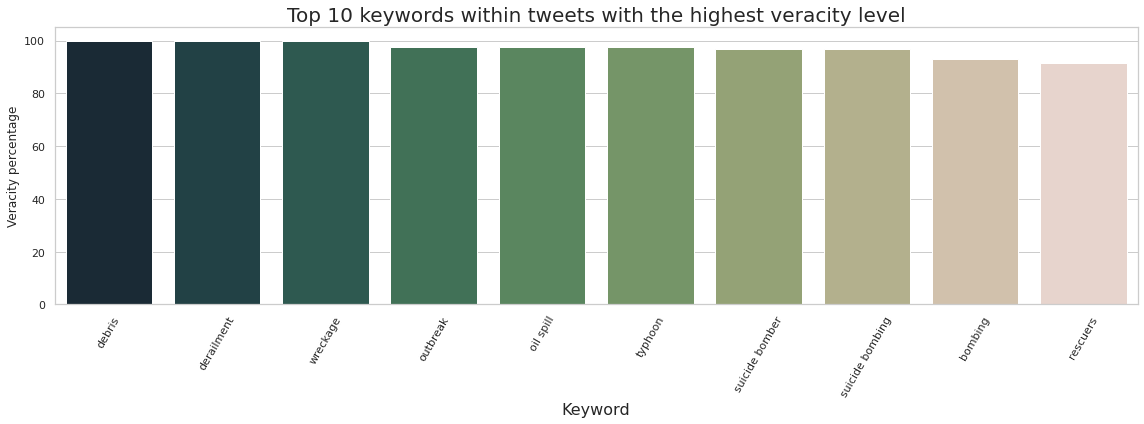

In [25]:
#barplot

ax = sns.barplot(x = 'keyword', y = 'veracity', data = top10KeywordsInRealTweets,\
                palette = sns.cubehelix_palette(10,  rot = -.75, reverse = True))
ax.set_ylabel('Veracity percentage', size = 12)
ax.set_xlabel('Keyword', size = 16)
ax.set_title('Top 10 keywords within tweets with the highest veracity level', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10keywordstweetshighestveracity.png", optimize = True)

In [26]:
top10KeywordsInFalseTweets = veracityPerKeyword.nsmallest(10, 'veracity')

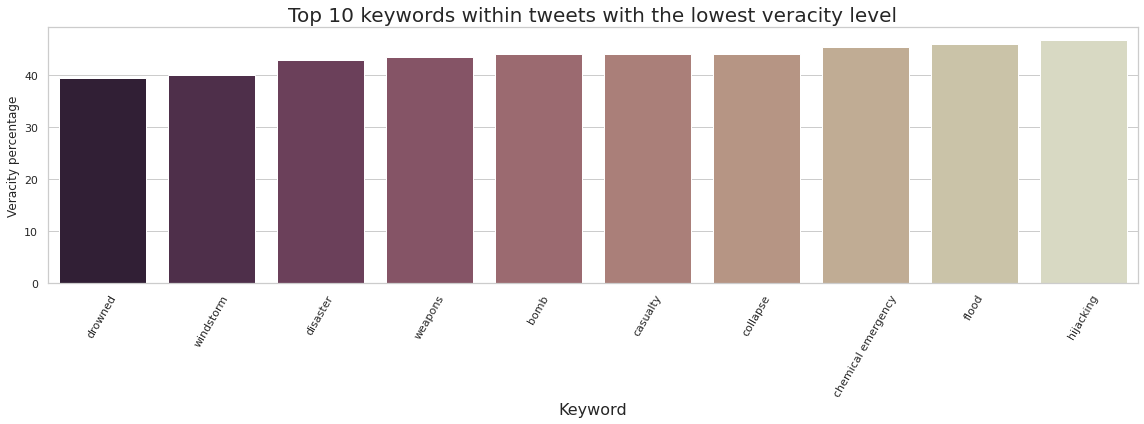

In [27]:
#barplot

ax = sns.barplot(x = 'keyword', y = 'veracity', data = top10KeywordsInFalseTweets,\
                palette = sns.cubehelix_palette(10, start=.1, rot = .55, reverse = True))
ax.set_ylabel('Veracity percentage', size = 12)
ax.set_xlabel('Keyword', size = 16)
ax.set_title('Top 10 keywords within tweets with the lowest veracity level', size = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.figure.set_size_inches(16, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10keywordstweetslowestveracity.png", optimize = True)

In [28]:
tweetsInfo = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['text', 'target'])
tweetsInfo.head()

text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1

In [29]:
#Starting the analisis for the relation between keywords and hashtags
hashForKeywordsAndHashtags = {}
csvFormatted = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['keyword', 'text', 'target'])
csvFormatted = csvFormatted[csvFormatted['keyword'] != 'unknown']
csvFormatted['keyword'].value_counts().head(20)

fatalities    45
earthquake    42
damage        42
deluge        42
armageddon    42
sinking       41
flooding      41
harm          41
body bags     41
evacuate      41
fire          41
collided      41
evacuation    40
outbreak      40
windstorm     40
twister       40
fear          40
siren         40
derailment    39
sinkhole      39
Name: keyword, dtype: int64

In [30]:
def sumHashtagIfNedeed(line, keyword, hashOfKeywords):
    for word in line.split():
        if not word.startswith('#'):
            continue
        word = word.lower().lstrip('#')
        if keyword not in hashOfKeywords:
            hashOfKeywords[keyword] = {}
        hashOfKeywords[keyword][word.lstrip('#')] = hashOfKeywords[keyword].get(word.lstrip('#'), 0) + 1

In [31]:
csvFormatted.apply(lambda x: sumHashtagIfNedeed(x['text'], x['keyword'], hashForKeywordsAndHashtags), axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Length: 7596, dtype: object

In [32]:
d = {'keyword': [], 'amount': []}
for key in hashForKeywordsAndHashtags:
    d['keyword'].append(key)
    d['amount'].append(sum(hashForKeywordsAndHashtags[key].values()))
keywordDf = pd.DataFrame(d, columns =['keyword', 'amount'])
keywordDf = keywordDf.sort_values(by = ['amount']).tail(20)
keywordDf

keyword  amount
209             weapons      29
141              mayhem      30
51   chemical emergency      31
49          catastrophe      31
124            hellfire      31
10    airplane accident      33
179           snowstorm      35
174             seismic      36
0            earthquake      38
122           hazardous      41
68               debris      43
87            displaced      44
119           hailstorm      44
97   emergency services      48
146    nuclear disaster      48
9            aftershock      51
127           hijacking      54
15           armageddon      57
190           terrorism      78
128            hostages      95

In [33]:
csvWithOnlyKeywordTarget = csvFormatted.drop('text', 1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.groupby(['keyword']).agg({'target': ['mean', 'count']})
csvWithOnlyKeywordTarget.columns = csvWithOnlyKeywordTarget.columns.get_level_values(0) + '_' + csvWithOnlyKeywordTarget.columns.get_level_values(1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.sort_values(by = ['target_mean']).reset_index() #Hasta aca tengo TODOS los valores de verdad
csvWithOnlyKeywordTarget = pd.merge(csvWithOnlyKeywordTarget, keywordDf, on='keyword', how='inner')
csvWithOnlyKeywordTarget.head(20)

keyword          target_mean  target_count  amount
0           aftershock                 0.00            34      51
1               mayhem                 0.10            30      30
2           armageddon                 0.12            42      57
3             hellfire                 0.18            39      31
4          catastrophe                 0.19            36      31
5   emergency services                 0.33            33      48
6              weapons                 0.44            39      29
7            snowstorm                 0.45            29      35
8   chemical emergency                 0.45            33      31
9              seismic                 0.47            30      36
10           hijacking                 0.47            32      54
11           hazardous                 0.63            35      41
12           terrorism                 0.71            34      78
13           displaced                 0.72            36      44
14            hostages                 0.73            37      95
15           hailstorm                 0.75            32      44
16          earthquake                 0.79            42      38
17   airplane accident                 0.86            35      33
18    nuclear disaster                 0.91            34      48
19              debris                 1.00            38      43

In [34]:
tweetsInfo['tweet_length'] = tweetsInfo.text.str.len()

In [35]:
def validUser(userName):
    if '@' in userName:
        user = getter(userName, '@')
        length = len(user)
        if (length > 1 and length <= 16):
            for char in user[1:]:
                if not(char.isalnum() or char == '_'): return False
            return True
    return False

In [36]:
def validLink(link):
    type1 = 'https://'
    type2 = 'http://'
    if type1 in link and len(link) > 9: return True
    if type2 in link and len(link) > 8: return True
    return False

In [37]:
def validHashtag(hashtag):
    if '#' in hashtag:
        hashtag = getter(hashtag, '#')
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [38]:
#Function to analyze the elements (#. @, links) of the tweet
def analyzeTweets(text):
    result = [0,0,0] #number of usersTagged, hashtags and links
    text = text.split()
    for word in text:
        if validUser(word): result[0] += 1
        elif validHashtag(word): result[1] += 1
        elif validLink(word): result[2] += 1
    return result

In [39]:
#This function creates a new DF, char = # or @
#dicc is a dictionary, key: @user or #hashtag, value: [number of occurrence, number of true targets]
#func1 get the hashtag or user correctly
#func2 cheks if the result of func1 is correct
#text its a combination of two columns, text and target, the target is in the last position always
def dataFrameMaker(text, dicc, char, func1, func2):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            auxString = func1(word, char)  #auxString could be a @user or a #hashtag
            if func2(auxString):
                auxString = auxString.lower()
                auxList = dicc[auxString] = dicc.get(auxString, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [40]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [41]:
#Gets the hashtag or user
def getter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some users or hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [42]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [43]:
def getInfo(dataList, pos):
    return dataList[pos]

In [44]:
#Aux column to get the result
tweetsInfo['aux_column'] = tweetsInfo.text.apply(analyzeTweets)

tweetsInfo['users_tagged'] = tweetsInfo.aux_column.apply(getInfo,args=(0,))
tweetsInfo['hashtags'] = tweetsInfo.aux_column.apply(getInfo,args=(1,))
tweetsInfo['links'] = tweetsInfo.aux_column.apply(getInfo,args=(2,))

del tweetsInfo['aux_column']
tweetsInfo.head()

text  target  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...       1            69   
1             Forest fire near La Ronge Sask. Canada       1            38   
2  All residents asked to 'shelter in place' are ...       1           133   
3  13,000 people receive #wildfires evacuation or...       1            65   
4  Just got sent this photo from Ruby #Alaska as ...       1            88   

   users_tagged  hashtags  links  
0             0         1      0  
1             0         0      0  
2             0         0      0  
3             0         1      0  
4             0         2      0

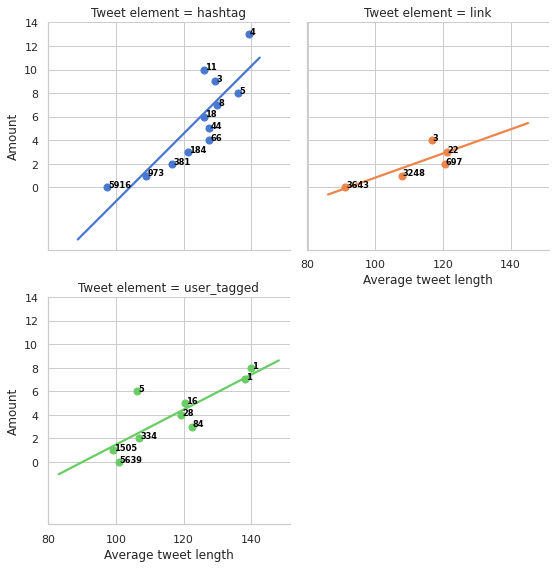

In [45]:
hashtagFrame = tweetsInfo[['tweet_length','hashtags']]
hashtagFrame['tweet_element'] = 'hashtag'

linksFrame = tweetsInfo[['tweet_length','links']]
linksFrame['tweet_element'] = 'link'

usersFrame = tweetsInfo[['tweet_length','users_tagged']]
usersFrame['tweet_element'] = 'user_tagged'

hashtagFrame.rename(columns={'hashtags':'Amount'},inplace=True)
linksFrame.rename(columns={'links':'Amount'},inplace=True)
usersFrame.rename(columns={'users_tagged':'Amount'},inplace=True)

appendedElements = hashtagFrame.append(linksFrame)
appendedElements = appendedElements.append(usersFrame)

groupedElements = appendedElements.groupby(['tweet_element','Amount']).agg({'tweet_length':['mean','count']})
labels0 = groupedElements.columns.get_level_values(0)
labels1 = groupedElements.columns.get_level_values(1)
groupedElements.columns = labels0 + '_' + labels1
groupedElements.reset_index(inplace=True)
groupedElements.rename(columns={'tweet_length_count':'occurrence', 'tweet_element':'Tweet element',\
                               'tweet_length_mean':'Average tweet length'}, inplace=True)
groupedElements

plot = sns.lmplot(x="Average tweet length", y="Amount", col="Tweet element", hue="Tweet element", data=groupedElements, col_wrap=2, ci=None, palette="muted", height=4,\
         scatter_kws={"s": 50, "alpha": 1},legend = True)

# add annotations one by one with a loop
auxCont = 0
auxDicc = {0:'hashtag',1:'link',2:'user_tagged'}
for ax in plot.axes:
    element = auxDicc[auxCont]
    for line in range(0, groupedElements.shape[0]):
            ax.set_yticks([0,2,4,6,8,10,12,14])
            if groupedElements['Tweet element'][line] == element:
                ax.text(groupedElements['Average tweet length'][line]+0.30, groupedElements.Amount[line], groupedElements.occurrence[line],\
                horizontalalignment='left', size='small', color='black', weight='semibold')
    auxCont += 1

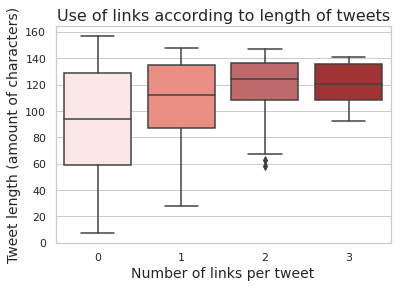

In [46]:
#Links boxplot
colors = {0: 'mistyrose', 1: 'salmon', 2: 'indianred', 3: 'firebrick'}
linksData = tweetsInfo[['tweet_length','links']][tweetsInfo.links <= 3]
ax = sns.boxplot(x = 'links', y = 'tweet_length', data = linksData, palette = colors)
ax.set_title('Use of links according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of links per tweet', fontsize = 14);

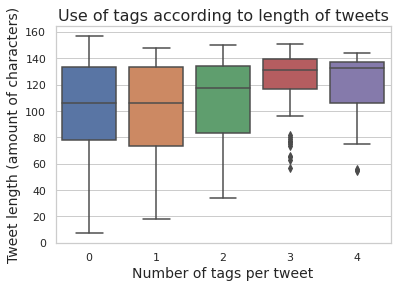

In [47]:
#Users tagged boxplot
usersTaggedData = tweetsInfo[['tweet_length','users_tagged']][tweetsInfo.users_tagged < 5]
ax = sns.boxplot(x = 'users_tagged', y = 'tweet_length', data = usersTaggedData)
ax.set_title('Use of tags according to length of tweets',fontsize = 16)
ax.set_ylabel('Tweet length (amount of characters)', fontsize = 14)
ax.set_xlabel('Number of tags per tweet', fontsize = 14);

In [48]:
#Building the usersTagged df
usersDicc = {}
tweetsInfoTags = colsCombination('users_tagged',0,'text','target')
tweetsInfoTags.apply(dataFrameMaker, args = (usersDicc,'@',getter,validUser))

31      None
36      None
43      None
54      None
63      None
        ... 
7577    None
7578    None
7581    None
7596    None
7609    None
Length: 1974, dtype: object

In [49]:
usersSerie = pd.Series(usersDicc)
usersDataFrame = usersSerie.to_frame(name='auxCol')
usersDataFrame['occurrence'] = usersDataFrame.auxCol.apply(getInfo,args=(0,))
usersDataFrame['target_sum'] = usersDataFrame.auxCol.apply(getInfo,args=(1,))
del usersDataFrame['auxCol']
usersDataFrame.head()

occurrence  target_sum
@bbcmtd                   1           1
@phdsquares               1           0
@southridgelife           1           0
@alexis_sanchez           1           0
@navista7                 1           1

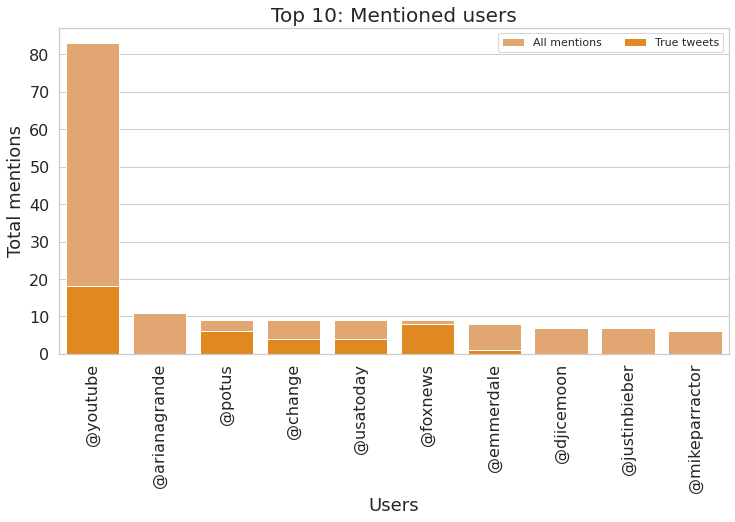

In [50]:
#Top 10 mentioned users barplot
topMentions = usersDataFrame[usersDataFrame.occurrence > 5]
topMentionUsers = topMentions.occurrence.nlargest(10).index

ax = sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'occurrence'],color='sandybrown',label='All mentions')
sns.barplot(x=topMentionUsers, y = topMentions.loc[topMentionUsers,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Top 10: Mentioned users', fontsize=20)
ax.set_xlabel('Users', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True);
ax.figure.set_size_inches(12, 6);

In [51]:
#Building the hashtags df
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('hashtags',0,'text','target')
tweetsInfoHashtags.apply(dataFrameMaker, args = (hashtagsDicc,'#',getter,validHashtag))

0       None
3       None
4       None
5       None
6       None
        ... 
7598    None
7599    None
7601    None
7604    None
7607    None
Length: 1697, dtype: object

In [52]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name='auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

occurrence  target_sum
#earthquake          19          19
#wildfires            5           5
#alaska               2           1
#rockyfire            4           4
#cafire               2           2

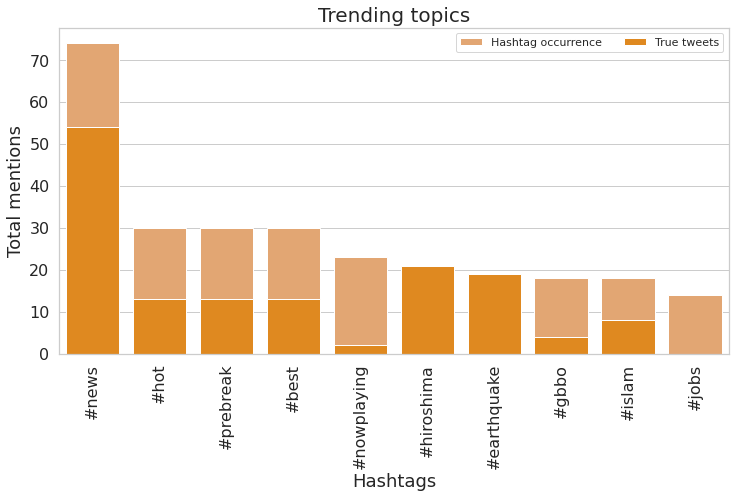

In [53]:
#Trending topics barplot
trendingTopics = hashtagsDataFrame[hashtagsDataFrame.occurrence > 5]
trendingTopicHashtags = trendingTopics.occurrence.nlargest(10).index

ax = sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'occurrence'],color='sandybrown',label='Hashtag occurrence')
sns.barplot(x=trendingTopicHashtags, y = trendingTopics.loc[trendingTopicHashtags,'target_sum'], color='darkorange',label='True tweets')

ax.set_title('Trending topics', fontsize=20)
ax.set_xlabel('Hashtags', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.legend(ncol=2, loc='best', frameon=True)
ax.figure.set_size_inches(12, 6);

In [54]:
grouped = tweetsInfo.groupby('tweet_length').agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
grouped['total_elements'] = grouped.links + grouped.hashtags + grouped.users_tagged
grouped['truth_percentage'] = (grouped.target / grouped.text) * 100
grouped.index.rename('lengths', inplace = True)

In [55]:
max_quantity, min_quantity = grouped.text.max(), grouped.text.min()
max_quantity, min_quantity

(401, 1)

In [56]:
grouped.drop(grouped[grouped.text <= 10].index, inplace=True)
grouped.reset_index(inplace = True)
grouped.head()

lengths  target  text  hashtags  users_tagged  links  total_elements  \
0       18       2    14         0             2      0               2   
1       19       1    11         0             2      0               2   
2       22       4    14         0             4      0               4   
3       24       2    12         0             4      0               4   
4       25       3    17         0             6      0               6   

      truth_percentage  
0                14.29  
1                 9.09  
2                28.57  
3                16.67  
4                17.65

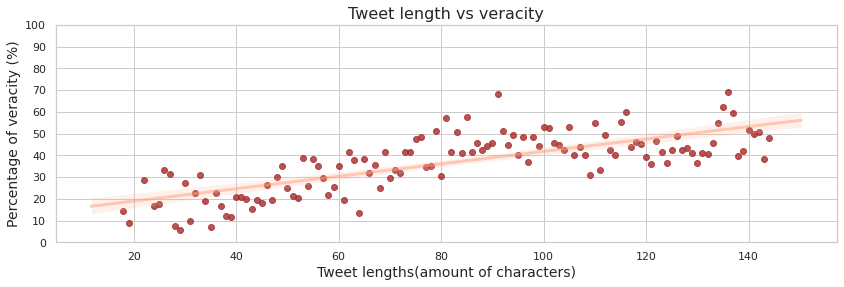

In [57]:
#Regplot 1
ax = sns.regplot(x='lengths', y='truth_percentage', data=grouped,\
                line_kws = {'color':'lightsalmon','alpha':0.5,'lw':3},\
                color = 'brown')

ax.set_xlabel('Tweet lengths(amount of characters)', fontsize = 14)
ax.set_ylabel('Percentage of veracity (%)', fontsize = 14)
ax.set_yticks(np.arange(0,110,10))
ax.set_title('Tweet length vs veracity', fontsize=16)
ax.figure.set_size_inches(14,4);

In [58]:
def tweetSize(tweetLength, minValue, intervalRange):
    if tweetLength < (minValue + intervalRange): return 'small'
    if (minValue + intervalRange) <= tweetLength and tweetLength < (minValue + 2 * intervalRange): return 'medium'
    return 'large'

In [59]:
#Parallel coordinates to show the characteristics of the tweets
#First we get the range of each interval
minValue = tweetsInfo.tweet_length.min()
maxValue = tweetsInfo.tweet_length.max()
intervalRange = (maxValue - minValue) // 3

#We add a new column
tweetsInfo['tweet_size'] = tweetsInfo.tweet_length.apply(tweetSize, args = (minValue, intervalRange))
tweetsInfo.head(5)

text  target  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...       1            69   
1             Forest fire near La Ronge Sask. Canada       1            38   
2  All residents asked to 'shelter in place' are ...       1           133   
3  13,000 people receive #wildfires evacuation or...       1            65   
4  Just got sent this photo from Ruby #Alaska as ...       1            88   

   users_tagged  hashtags  links tweet_size  
0             0         1      0     medium  
1             0         0      0      small  
2             0         0      0      large  
3             0         1      0     medium  
4             0         2      0     medium

In [60]:
groupedSize = tweetsInfo.groupby(['tweet_size', 'tweet_length']).agg({'target':'sum','users_tagged':'sum','links':'sum','hashtags':'sum', 'text':'count'})
groupedSize.reset_index(inplace=True)
groupedSize['truth_percentage'] = (groupedSize.target / groupedSize.text) * 100
groupedSize = groupedSize[groupedSize.text >= 10]

In [61]:
#For the plot we need a numerical value to plot the lines in different colors
def tweetSizeID(tweet):
    if tweet == 'small': return 1
    if tweet == 'medium': return 2
    return 3

groupedSize['tweet_size_id'] = groupedSize.tweet_size.apply(tweetSizeID)

In [62]:
#Parallel coordinates
fig = px.parallel_coordinates(groupedSize, color= 'tweet_size_id',\
                              dimensions=['tweet_size_id','tweet_length','links' ,'hashtags',\
                                          'users_tagged','truth_percentage'],\
                             labels = {'tweet_length':'Tweet length','links':'Links sum','hashtags':'Hashtags sum',\
                                      'users_tagged':'Users tagged sum','truth_percentage':'Truth perentage',\
                                      'tweet_size_id':'Tweet size ID'})

fig.update_layout(coloraxis_showscale=False)
fig.update_layout(title={'text': 'Characteristics of the tweets according to their length','y':1.,'x':0.5})
fig.show()

In [63]:
#Natural disasters
df1 = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols=['id','keyword','location'])
df2 = tweetsInfo
disastersDF = pd.concat([df1,df2], axis = 1)
disastersDF.head()

id     keyword    location  \
0   1  earthquake          us   
1   4        fire          la   
2   5  evacuation     unknown   
3   6  evacuation  california   
4   7       smoke      alaska   

                                                text  target  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...       1            69   
1             Forest fire near La Ronge Sask. Canada       1            38   
2  All residents asked to 'shelter in place' are ...       1           133   
3  13,000 people receive #wildfires evacuation or...       1            65   
4  Just got sent this photo from Ruby #Alaska as ...       1            88   

   users_tagged  hashtags  links tweet_size  
0             0         1      0     medium  
1             0         0      0      small  
2             0         0      0      large  
3             0         1      0     medium  
4             0         2      0     medium

In [64]:
#Some auxiliar functions
def getSeriesElements(serie, setElements):
    for element in serie.values: #Element is a string always
        if '/' in element:
            element = element.split('/')
            for elemt in element: setElements.add(elemt.lower())
                
        else: setElements.add(element.lower())

In [65]:
#the info is between position 2 and 6, both included
def obtainInfo(infoList):
    naturalDisasters = {} #Key: group, value: {subgroups}
    for i in range (2,7): #To iterate the info in the list
        dataFrame = infoList[i]
        #Always delete the first row, it dosent have info
        dataFrame.drop(0, inplace = True)
        #The group always is at (0,1)
        group = dataFrame.iloc[0,1]
        #Now its time to iterate the columns of the DF
        cols = len(dataFrame.columns)
        subgroups = set()
        for col in range(2, cols):
            serie = dataFrame[col] #This is a serie
            serie.dropna(inplace=True)
            serie.drop_duplicates(inplace=True)
            getSeriesElements(serie, subgroups)
        naturalDisasters[group] = subgroups
    return naturalDisasters

In [66]:
#Reading the info about natural disasters
#naturalDisastersDicc key: group value: set of subgroups
dataPage = pd.read_html('https://www.emdat.be/classification')
naturalDisastersDicc = obtainInfo(dataPage)

In [67]:
#Adding missing items
geo = naturalDisastersDicc['Geophysical']
geo.update({'volcano', 'sinkhole', 'lava'})

met = naturalDisastersDicc['Meteorological']
met.update({'hurricane','typhoon','twister','cyclone','hailstorm',\
            'violent storm','rainstorm','sandstorm','snowstorm','windstorm'})
met -= {'lightning','derecho','sand','wind'}

hydro = naturalDisastersDicc['Hydrological']
hydro.update({'debris','mudslide','avalanche','rockfall'})
hydro.remove('avalanche (snow, debris, mudflow, rockfall)')

clima = naturalDisastersDicc['Climatological']
clima.update({'bush fire', 'land fire', 'brush fire'})
clima.remove('land fire: brush, bush,  pasture')

In [68]:
#Creating a new set with the union of all the subgroups
allNaturalDisasters = set()
for value in naturalDisastersDicc.values():
    allNaturalDisasters = allNaturalDisasters.union(value)

In [69]:
#Some keywords are about natural disasters but they are in plural
#we fix that with this function
def fixingKeywords(keyword):
    auxDictionary = {'floods':'flood', 'wild fires': 'wildfire', 'forest fires':'forest fire',\
                    'bush fires':'bush fire'}
    return auxDictionary.get(keyword, keyword)

In [70]:
disastersDF.keyword = disastersDF.keyword.apply(fixingKeywords)

In [71]:
condition = ~(disastersDF.keyword.isin(allNaturalDisasters))
naturalDisastersDF = disastersDF.drop(disastersDF[condition].index)
naturalDisastersDF.head()

id     keyword     location  \
0      1  earthquake           us   
9     15     tornado      unknown   
10    16   heat wave      unknown   
13    19       flood         bago   
517  746   avalanche  los angeles   

                                                  text  target  tweet_length  \
0    Our Deeds are the Reason of this #earthquake M...       1            69   
9    I'm afraid that the tornado is coming to our a...       1            52   
10         Three people died from the heat wave so far       1            43   
13             #Flood in Bago Myanmar #We arrived Bago       1            39   
517  #WeLoveLA #NHLDucks Avalanche Defense: How The...       0           112   

     users_tagged  hashtags  links tweet_size  
0               0         1      0     medium  
9               0         0      0      small  
10              0         0      0      small  
13              0         2      0      small  
517             0         3      1      large

In [72]:
#group by subgroup of natural disaster
natDisastGrouped = naturalDisastersDF.groupby('keyword').agg({'tweet_length':['max','min','mean'],\
                                                             'text':'count','target':'sum',\
                                                             'users_tagged':'sum','hashtags':'sum','links':'sum'})
natDisastGrouped.head()

tweet_length                           text target users_tagged  \
                   max min                 mean count    sum          sum   
keyword                                                                     
avalanche          139  34               101.20    30      4            7   
blizzard           140  20                71.89    37      4           20   
bush fire          140  33               107.88    25     18           10   
cyclone            142  52               109.22    32     19           10   
debris             140  34               107.97    38     38            3   

          hashtags links  
               sum   sum  
keyword                   
avalanche       18    29  
blizzard         3    15  
bush fire        3    20  
cyclone         20    26  
debris          19    35

In [73]:
#Changing the labels
labels0 = natDisastGrouped.columns.get_level_values(0)
labels1 = natDisastGrouped.columns.get_level_values(1)
natDisastGrouped.columns = labels0 + '_' + labels1
natDisastGrouped.head()

tweet_length_max  tweet_length_min    tweet_length_mean  \
keyword                                                              
avalanche               139                34               101.20   
blizzard                140                20                71.89   
bush fire               140                33               107.88   
cyclone                 142                52               109.22   
debris                  140                34               107.97   

           text_count  target_sum  users_tagged_sum  hashtags_sum  links_sum  
keyword                                                                       
avalanche          30           4                 7            18         29  
blizzard           37           4                20             3         15  
bush fire          25          18                10             3         20  
cyclone            32          19                10            20         26  
debris             38          38                 3            19         35

In [74]:
#Function to obtain the group of a keyword
def naturalDisasterGroup(keyword):
    for key, value in naturalDisastersDicc.items():
        if keyword in value: return key

In [75]:
natDisastGrouped.reset_index(inplace=True)
#Adding the column 'group', to the data frama
natDisastGrouped['group'] = natDisastGrouped.keyword.apply(naturalDisasterGroup)

In [76]:
natDisastGrouped.shape

(31, 10)

In [77]:
natDisastGrouped.rename(columns = {'keyword':'subgroup'},inplace=True)
natDisastGrouped.sort_values(by='group',inplace=True)  #easy to order, has 30 rows

In [78]:
natDisastGrouped.set_index(['group','subgroup'],inplace=True)
natDisastGrouped.head()

tweet_length_max  tweet_length_min  \
group          subgroup                                          
Climatological bush fire                 140                33   
               drought                   140                26   
               wildfire                  144                36   
               forest fire               140                42   
Geophysical    lava                      139                11   

                              tweet_length_mean  text_count  target_sum  \
group          subgroup                                                   
Climatological bush fire                 107.88          25          18   
               drought                    99.43          35          28   
               wildfire                  107.77          66          58   
               forest fire               106.96          51          42   
Geophysical    lava                       86.68          34           5   

                            users_tagged_sum  hashtags_sum  links_sum  
group          subgroup                                                
Climatological bush fire                  10             3         20  
               drought                     9            20         28  
               wildfire                   16            35         52  
               forest fire                12            18         36  
Geophysical    lava                       18            12         21

In [79]:
#Adding the column 'truth_percentage' = (target_sum / text_count) * 100
natDisastGrouped['truth_percentage'] = (natDisastGrouped.target_sum / natDisastGrouped.text_count) * 100
natDisastGrouped

tweet_length_max  tweet_length_min  \
group          subgroup                                            
Climatological bush fire                   140                33   
               drought                     140                26   
               wildfire                    144                36   
               forest fire                 140                42   
Geophysical    lava                        139                11   
               volcano                     143                30   
               tsunami                     148                18   
               sinkhole                    147                32   
               earthquake                  142                14   
               landslide                   145                34   
Hydrological   mudslide                    135                25   
               avalanche                   139                34   
               flood                       145                21   
               debris                      140                34   
Meteorological heat wave                   141                33   
               blizzard                    140                20   
               violent storm               140                55   
               typhoon                     145                37   
               twister                     148                29   
               cyclone                     142                52   
               tornado                     141                26   
               thunderstorm                140                29   
               storm                       141                14   
               snowstorm                   146                50   
               sandstorm                   140                22   
               rainstorm                   140                25   
               dust storm                  140                25   
               hail                        142                29   
               hurricane                   141                17   
               hailstorm                   142                33   
               windstorm                   142                40   

                                tweet_length_mean  text_count  target_sum  \
group          subgroup                                                     
Climatological bush fire                   107.88          25          18   
               drought                      99.43          35          28   
               wildfire                    107.77          66          58   
               forest fire                 106.96          51          42   
Geophysical    lava                         86.68          34           5   
               volcano                     109.04          28          19   
               tsunami                      85.76          34          11   
               sinkhole                     99.92          39          27   
               earthquake                  105.05          42          33   
               landslide                   107.18          33          14   
Hydrological   mudslide                     73.27          37          12   
               avalanche                   101.20          30           4   
               flood                       114.92          73          43   
               debris                      107.97          38          38   
Meteorological heat wave                   104.39          36          27   
               blizzard                     71.89          37           4   
               violent storm               114.21          33          26   
               typhoon                     112.26          39          38   
               twister                      95.30          40           5   
               cyclone                     109.22          32          19   
               tornado                      90.63          38          19   
              

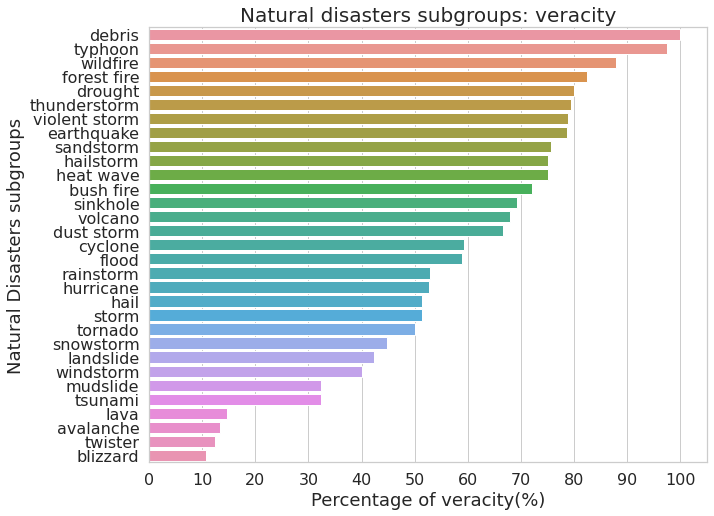

In [80]:
#Veracity of the subgroups
subVeracity = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)
ax = sns.barplot(x = 'truth_percentage', y = subVeracity.subgroup, data = subVeracity);
ax.set_title('Natural disasters subgroups: veracity', fontsize=20)
ax.set_xlabel('Percentage of veracity(%)', fontsize = 18)
ax.set_ylabel('Natural Disasters subgroups', fontsize = 18)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.set_xticks(np.arange(0,110,10))
ax.figure.set_size_inches(10, 8);

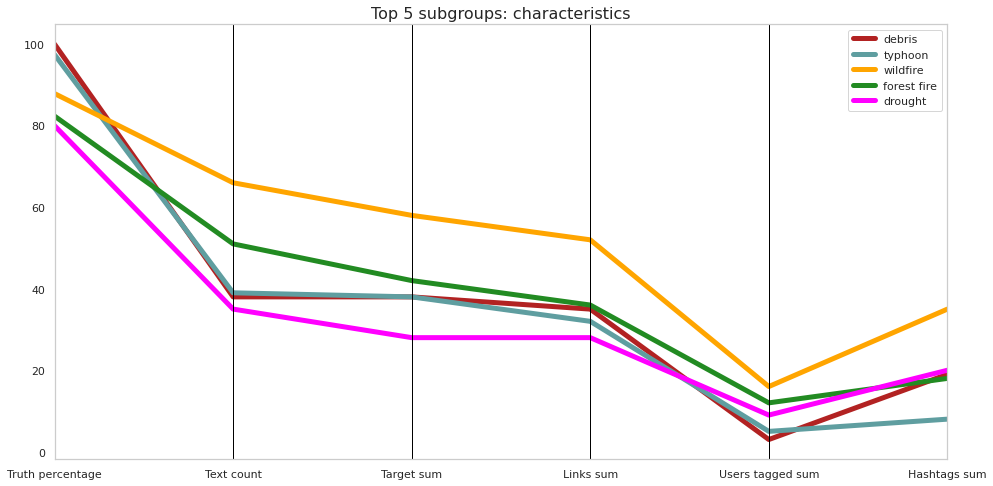

In [81]:
#Parallel coordinates
from pandas.plotting import parallel_coordinates
df = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)[:5].rename(columns={'truth_percentage':'Truth percentage', 'text_count':'Text count',\
                                                                                                           'target_sum':'Target sum','links_sum':'Links sum',\
                                                                                                           'users_tagged_sum':'Users tagged sum','hashtags_sum':'Hashtags sum'})
lineColors = ('firebrick','cadetblue','orange','forestgreen','magenta')

ax = parallel_coordinates(df, 'subgroup', cols = ['Truth percentage', 'Text count','Target sum','Links sum', 'Users tagged sum','Hashtags sum'],\
                          color = lineColors, lw = 5.0)
ax.set_title('Top 5 subgroups: characteristics', fontsize= 16)
ax.figure.set_size_inches(16, 8)
ax.legend(loc='best');

In [82]:
#Analysis of kind of hashtags used in tweets based on tweet's veracity

In [83]:
train = tweetsInfo

In [84]:
tweetsInfo = twitterCleanData[['text', 'target']]
tweetsInfo.head()

text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1

In [85]:
#Receives a text
#Returns a list containing all valid hashtags on the text
#A hashtag is valid if it only contains alphanumeric values
def getValidHashtags(text, char):
    resultingHashtags = []
    text = text.split()
    for word in text:
        hashtag = getter(word, char)
        if validHashtag(hashtag) == True:
                resultingHashtags.append(hashtag)
    return resultingHashtags

In [86]:
hashtagsDataFrame = hashtagsDataFrame.reset_index()
hashtagsDataFrame = hashtagsDataFrame.rename(columns = {'index' : 'hashtag'})
hashtagsDataFrame.head()

hashtag  occurrence  target_sum
0  #earthquake          19          19
1   #wildfires           5           5
2      #alaska           2           1
3   #rockyfire           4           4
4      #cafire           2           2

In [87]:
textPerVeracity = tweetsInfo.groupby('target').agg({'text' : 'sum'})

In [88]:
#Returns a DF with hashtags included in tweets of veracity 'target', their occurrence and target_sum
#target = 0 -> false tweets
#target = 1 -> real tweets
def hashtagPerVeracityDFMaker(target, char):
    df = pd.DataFrame()
    df['hashtag'] = getValidHashtags(textPerVeracity.loc[target,'text'], char)
    df = hashtagsDataFrame.merge(df, on = 'hashtag')
    df = df.drop_duplicates()
    return df

In [89]:
#Creating DF with hashtags and the veracity of the tweets containing them
#Hashtags in false tweets:
DFHashtagPerFalseTweets = hashtagPerVeracityDFMaker(0, '#')
DFHashtagPerFalseTweets['occurrence'] = DFHashtagPerFalseTweets['occurrence'] - DFHashtagPerFalseTweets['target_sum']
del DFHashtagPerFalseTweets['target_sum']
top10HashtagPerFalseTweets = DFHashtagPerFalseTweets.nlargest(10, columns = 'occurrence')
top10HashtagPerFalseTweets.head(3)

hashtag  occurrence
5    #nowplaying          21
19         #news          20
336         #hot          17

In [90]:
#Some statistics
DFHashtagPerFalseTweets.describe()

occurrence
count               402.00
mean                  1.69
std                   2.27
min                   1.00
25%                   1.00
50%                   1.00
75%                   1.00
max                  21.00

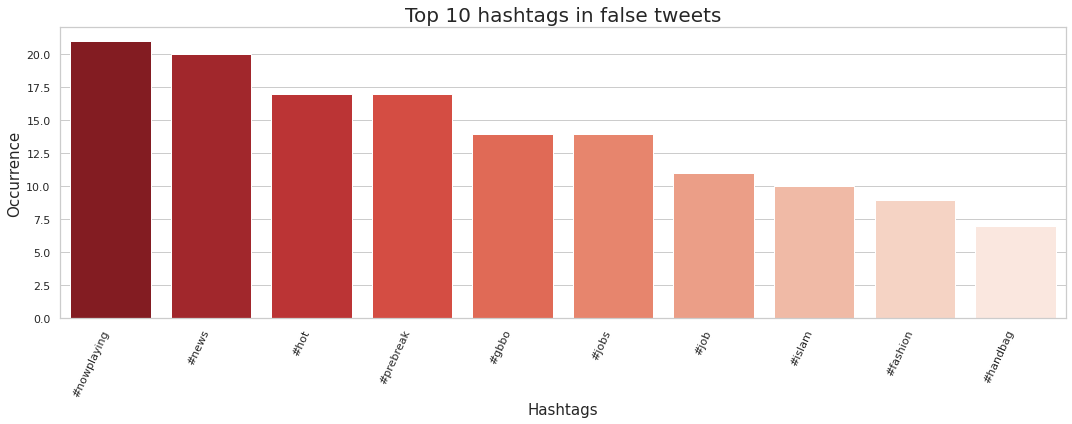

In [91]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerFalseTweets,\
                 palette = sns.color_palette("Reds_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in false tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInFalseTweets.png")

In [92]:
#Hashtags in real tweets:
DFHashtagPerRealTweets = hashtagPerVeracityDFMaker(1, '#')
DFHashtagPerRealTweets['occurrence'] = DFHashtagPerRealTweets['target_sum']
del DFHashtagPerRealTweets['target_sum']
top10HashtagPerRealTweets = DFHashtagPerRealTweets.nlargest(10, 'occurrence')
top10HashtagPerRealTweets.head(3)

hashtag  occurrence
25        #news          54
88   #hiroshima          21
0   #earthquake          19

In [93]:
#Some statistics
DFHashtagPerRealTweets.describe()

occurrence
count               306.00
mean                  2.11
std                   3.80
min                   1.00
25%                   1.00
50%                   1.00
75%                   2.00
max                  54.00

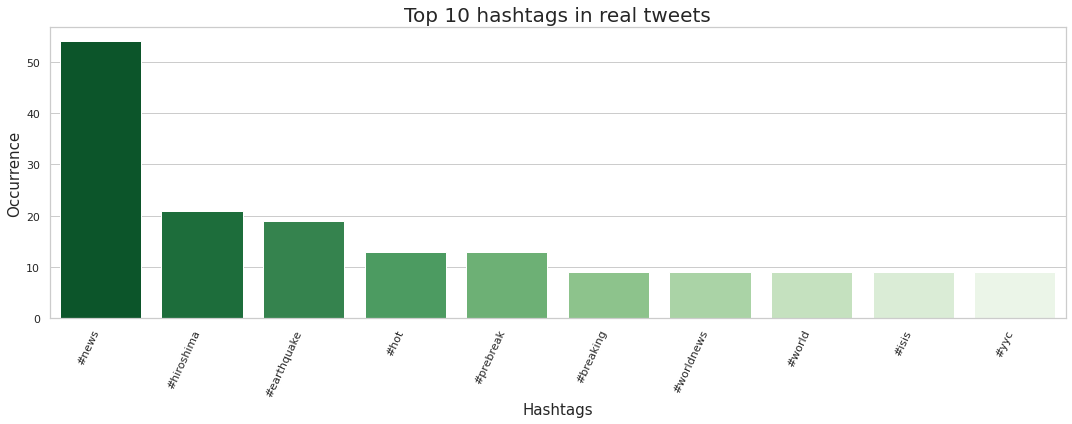

In [94]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = top10HashtagPerRealTweets,\
                 palette = sns.color_palette("Greens_r", 10))
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15)
ax.set_title('Top 10 hashtags in real tweets', fontsize = 20)
plt.xticks(rotation = 65, horizontalalignment = 'right')
ax.figure.set_size_inches(15, 6)
plt.tight_layout()
ax.get_figure().savefig("Top10HashtagsInRealTweets.png")

In [95]:
#Comparison between hashtags that appear both in real and false tweets
hashtagsPerVeracity = DFHashtagPerFalseTweets.merge(DFHashtagPerRealTweets, on = 'hashtag')
hashtagsPerVeracity.head(3)

hashtag  occurrence_x  occurrence_y
0       #news            20            54
1  #gilbert23             2             1
2      #video             2             2

In [96]:
hashtagsPerVeracity['total occurrence'] = hashtagsPerVeracity['occurrence_x'] + hashtagsPerVeracity['occurrence_y']
hashtagsPerVeracity = hashtagsPerVeracity.rename(columns = {'occurrence_y' : 'occurrence real tweets'})
del hashtagsPerVeracity['occurrence_x']
top10HashtagsPerVeracity = hashtagsPerVeracity.nlargest(20, 'total occurrence')

In [97]:
hashtagsPerVeracity.describe()

occurrence real tweets     total occurrence
count                   45.00                45.00
mean                     3.93                 7.00
std                      8.19                11.92
min                      1.00                 2.00
25%                      1.00                 3.00
50%                      2.00                 3.00
75%                      3.00                 6.00
max                     54.00                74.00

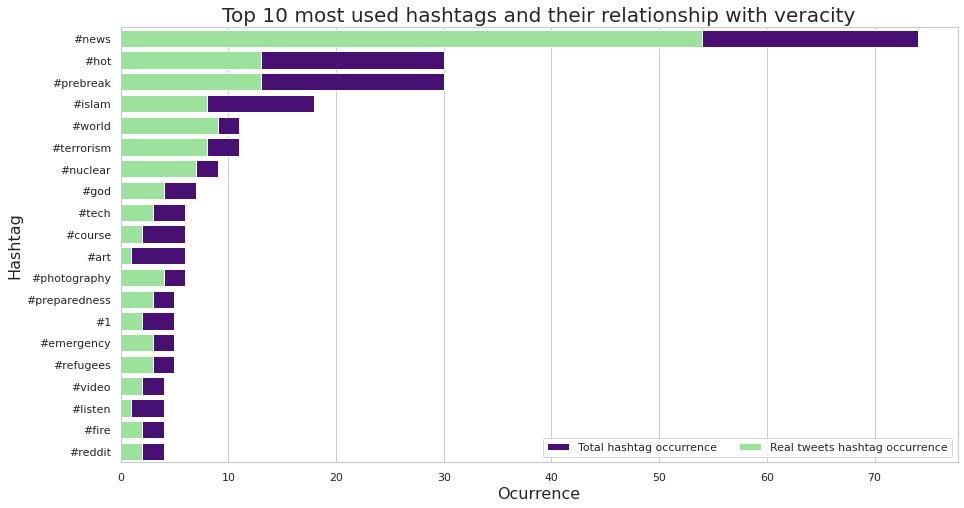

In [98]:
#Barplot
f, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = 'total occurrence', y = 'hashtag', data = top10HashtagsPerVeracity,\
            label = 'Total hashtag occurrence', color = 'indigo', edgecolor = 'w')
sns.barplot(x = 'occurrence real tweets', y = 'hashtag', data = top10HashtagsPerVeracity,
            label = 'Real tweets hashtag occurrence', color = 'lightgreen', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xlabel('Ocurrence', fontsize = 16)
ax.set_ylabel('Hashtag', fontsize = 16)
ax.set_title('Top 10 most used hashtags and their relationship with veracity', fontsize = 20)
plt.savefig("Top10HashtagsAndTheirVeracity.png")
plt.show()

In [99]:
locations = pd.read_csv('./ToChangeKeywordsAndLocations/worldcities.csv', encoding = 'latin-1')
tweets = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')

In [100]:
cities = {}
countries = {}
cityExceptions = {'London':'United Kingdom','Glasgow':'United Kingdom', 'Birmingham': 'United Kingdom', 'Rome':'Italy','Delhi':'India',\
                 'Paris':'France', 'Moscow':'Russia', 'Geneva':'Switzerland', 'Melbourne':'Australia','Manchester':'United Kingdom','Leicester':'United Kingdom'}
states = {}
def applyCriteria(row):
    if cities.get(row['city'], False) or (cityExceptions.get(row['city'], False) and cityExceptions.get(row['city']) != row['country']):
        return row
    cities[row['city'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
    countries[row['country'].lower().strip('.').rstrip()] = row['iso3']
    if ((row['capital'] == 'admin' or row['capital'] == 'primary') and isinstance(row['admin_name'], str)):
        states[row['admin_name'].lower().strip('.').rstrip()] = [(row['lat'], row['lng']),row['iso3']]
locations.apply(applyCriteria, axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
15488    None
15489    None
15490    None
15491    None
15492    None
Length: 15493, dtype: object

In [101]:
changePlace = {'ny': 'new york', 'la': 'los angeles', 'ca': 'california', 'tx': 'texas', 'us':'usa', 'nc': 'north carolina'}
def addNewData(row):
    place = row['location']
    if place in changePlace:
        place = changePlace[place]
    if place in countries:
        row['country'] = countries[place]
    elif place in states:
        row['country'] = states[place][1]
        row['lat'] = states[place][0][0]
        row['long'] = states[place][0][1]
    elif place in cities:
        row['country'] = cities[place][1]
        row['lat'] = cities[place][0][0]
        row['long'] = cities[place][0][1]
    return row
tweets = tweets.apply(addNewData, axis = 1, result_type= 'expand')
tweets.tail(5)

country     id          keyword                  lat    location  \
7608     NaN  10869  bridge collapse                  nan     unknown   
7609     USA  10870       wild fires                38.57  california   
7610     NaN  10871          volcano                  nan     unknown   
7611     NaN  10872           police                  nan     unknown   
7612     USA  10873         wildfire                38.57  california   

                     long  target  \
7608                  nan       1   
7609              -121.47       1   
7610                  nan       1   
7611                  nan       1   
7612              -121.47       1   

                                                   text  
7608  Two giant cranes holding a bridge collapse int...  
7609  @aria_ahrary @TheTawniest The out of control w...  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...  
7611  Police investigating after an e-bike collided ...  
7612  The Latest: More Homes Razed by Northern Calif...

In [102]:
#Geo analysis
from shapely.geometry import Point
import geopandas as gpd

frames = [disastersDF, tweets[['country','lat','long']]]
disastersWorldDF = pd.concat(frames, axis = 1)

condition = ~(disastersWorldDF.keyword.isin(allNaturalDisasters))
natDisastWorldDF = disastersWorldDF.drop(disastersWorldDF[condition].index)#Creating a DF with the natural disasters only

#Droping rows with NaNs
natDisastWorldDF.dropna(inplace = True)

#Creating a new column with the coordinates
natDisastWorldDF['coordinates'] = list(zip(natDisastWorldDF['long'],natDisastWorldDF['lat']))
natDisastWorldDF['coordinates'] = natDisastWorldDF['coordinates'].apply(Point)
natDisastWorldDF.head()

id    keyword     location  \
13    19      flood         bago   
517  746  avalanche  los angeles   
520  752  avalanche     colorado   
522  754  avalanche     new york   
524  758  avalanche     colorado   

                                                  text  target  tweet_length  \
13             #Flood in Bago Myanmar #We arrived Bago       1            39   
517  #WeLoveLA #NHLDucks Avalanche Defense: How The...       0           112   
520  #Colorado #Avalanche Men's Official Colorado A...       0           125   
522  I BET YOU DIDNT KNOW I KICK BOX TOO! https://t...       0            60   
524  PATRICK ROY 1998-99 UPPER DECK SPX #171 FINITE...       0           126   

     users_tagged  hashtags  links tweet_size country                  lat  \
13              0         2      0      small     MMR                17.32   
517             0         3      1      large     USA                34.11   
520             0         4      1      large     USA                39.76   
522             0         0      1     medium     USA                42.67   
524             0         1      2      large     USA                39.76   

                    long                coordinates  
13                 96.52       POINT (96.515 17.32)  
517              -118.41  POINT (-118.4068 34.1139)  
520              -104.88  POINT (-104.8759 39.7621)  
522               -73.80   POINT (-73.7987 42.6664)  
524              -104.88  POINT (-104.8759 39.7621)

In [103]:
#Some iso codes are integers
def fixISOCode(dataFrame):
    dataFrame.loc[43, 'iso_a3'] = 'FRA'
    dataFrame.loc[21, 'iso_a3'] = 'NOR'
    dataFrame.loc[174, 'iso_a3'] = 'RKS'

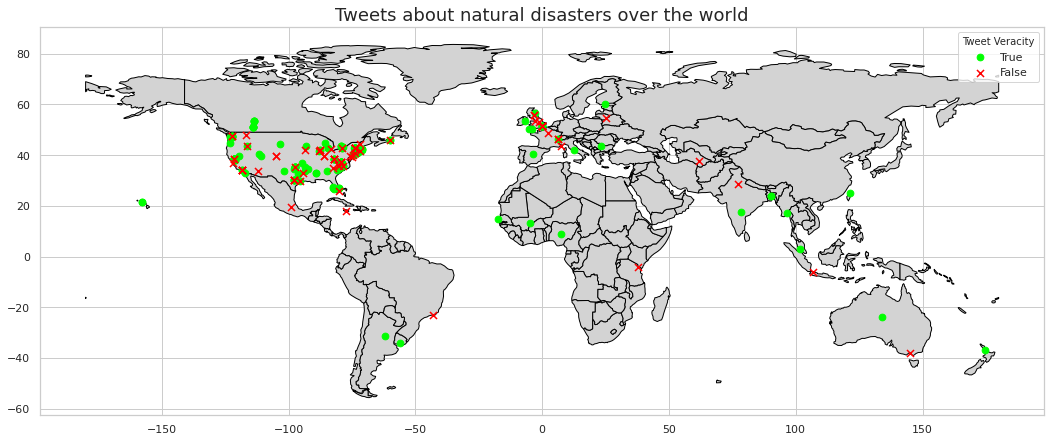

In [104]:
trueNatDisast = natDisastWorldDF[natDisastWorldDF.target == 1]
falseNatDisast = natDisastWorldDF[natDisastWorldDF.target == 0]

#creating a geopandas data frame
trueNatDisast = gpd.GeoDataFrame(trueNatDisast, geometry='coordinates')
falseNatDisast = gpd.GeoDataFrame(falseNatDisast, geometry='coordinates')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #World map
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(color='lightgrey',edgecolor='black', figsize = (18,10)) #Setting colors

graf = trueNatDisast.plot(ax=ax, legend=True, marker='o', color= 'lime', markersize = 45)
graf = falseNatDisast.plot(ax=ax, legend=True, marker='x', color='red', markersize = 50)
graf.axes.set_title('Tweets about natural disasters over the world', fontsize = 18)
graf.legend(['True','False'], title = 'Tweet Veracity');

In [105]:
#Truth percentage per country
disastersWorldDF.dropna(subset = ['country'], inplace = True)
groupedCountry = disastersWorldDF.groupby(['country']).agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
groupedCountry['truth_percentage'] = (groupedCountry.target / groupedCountry.text) * 100

#groupedCountry.rename(columns = {'target':'target_count', 'text':'text_count'}, inplace = True)
groupedCountry.reset_index(inplace=True)
groupedCountry.rename(columns = {'country':'iso_a3', 'target':'target_count', 'text':'text_count'}, inplace=True)

groupedCountry = groupedCountry[groupedCountry.text_count >= 5]

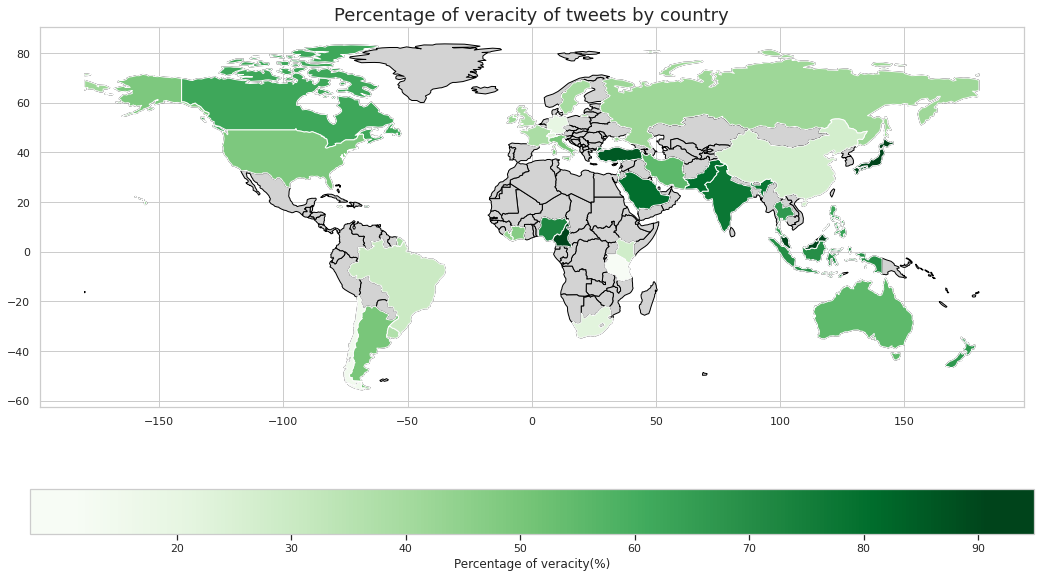

In [106]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != 'Antarctica']
fixISOCode(world)
ax = world.plot(column = 'name',color='lightgrey',edgecolor='black', figsize = (18,10))
world = world.merge(groupedCountry) #Merging the data frame so we have the info

#Plot
graf = world.plot(ax = ax, column='truth_percentage', legend = True, cmap='Greens',\
                 legend_kwds={'label': 'Percentage of veracity(%)', 'orientation': 'horizontal','extend':'both','extendrect':True})
graf.axes.set_title('Percentage of veracity of tweets by country', fontsize = 18);

In [107]:
#USA geo analysis
#Function to find which state a point belongs to
def findState(coordinate, statesDF):
    iterable = statesDF.values #List of list [state, polygon]
    for stateInfo in iterable:
        if coordinate.within(stateInfo[1]):
            return stateInfo[0]
    return np.nan

In [108]:
import geoplot as gplt
usaData = disastersWorldDF[disastersWorldDF.country == 'USA'].dropna()
usaData['coordinates'] = list(zip(usaData['long'],usaData['lat']))
usaData['coordinates'] = usaData['coordinates'].apply(Point)

contiguousUsa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) #USA map with contiguous states
usaData['state'] = usaData.coordinates.apply(findState, args = (contiguousUsa[['state','geometry']],))
usaData.dropna(inplace=True)

#Grouping per state
statesGrouped = usaData.groupby('state').agg({'text':'count', 'target':'sum', 'users_tagged':'sum', 'hashtags':'sum', 'links':'sum',\
                                             'tweet_length':['max','min','mean']})

#Renaming the labels
labels0 = statesGrouped.columns.get_level_values(0)
labels1 = statesGrouped.columns.get_level_values(1)
statesGrouped.columns = labels0 + '_' + labels1
statesGrouped['truth_percentage'] = (statesGrouped.target_sum / statesGrouped.text_count) * 100
statesGrouped = statesGrouped[statesGrouped.text_count >= 5]
statesGrouped.reset_index(inplace=True)
statesGrouped.head(5)

state  text_count  target_sum  users_tagged_sum  hashtags_sum  \
0     Alabama          15           9                 2             7   
1     Arizona          14           6                 8             2   
2    Arkansas          12           5                 8             2   
3  California         113          77                15            59   
4    Colorado          22           9                11            20   

   links_sum  tweet_length_max  tweet_length_min    tweet_length_mean  \
0         14               136                76               107.87   
1          7               138                19               101.57   
2          3               140                29                81.58   
3        107               144                16               104.13   
4         21               140                46               118.77   

      truth_percentage  
0                60.00  
1                42.86  
2                41.67  
3                68.14  
4                40.91

## Machine learning

In [109]:
#Imports
from numpy import linalg as LA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [110]:
def validLocation(location):
    return int(location != 'unknown')

In [111]:
def sizes(size):
    if size == 'small': return 0
    if size == 'medium': return 5
    return 10

In [112]:
disastersDF['Valid_location'] = disastersDF.location.apply(validLocation)
disastersDF['tweet_size'] = disastersDF.tweet_size.apply(sizes)
disastersDF.head()

id     keyword    location  \
0   1  earthquake          us   
1   4        fire          la   
2   5  evacuation     unknown   
3   6  evacuation  california   
4   7       smoke      alaska   

                                                text  target  tweet_length  \
0  Our Deeds are the Reason of this #earthquake M...       1            69   
1             Forest fire near La Ronge Sask. Canada       1            38   
2  All residents asked to 'shelter in place' are ...       1           133   
3  13,000 people receive #wildfires evacuation or...       1            65   
4  Just got sent this photo from Ruby #Alaska as ...       1            88   

   users_tagged  hashtags  links  tweet_size  Valid_location  
0             0         1      0           5               1  
1             0         0      0           0               1  
2             0         0      0          10               0  
3             0         1      0           5               1  
4             0         2      0           5               1

In [113]:
disastersDF.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [114]:
disastersDF.shape

(7613, 11)

In [115]:
trueTweetsPercentage = (3271 * 100) / 7613
falseTweetsPercentage = 100 - trueTweetsPercentage
trueTweetsPercentage, falseTweetsPercentage

(42.965979246026535, 57.034020753973465)

In [116]:
X, y = disastersDF.iloc[:,5:], disastersDF.iloc[:,4]  #X tiene que tener todos los features distintos al target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [117]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.512517


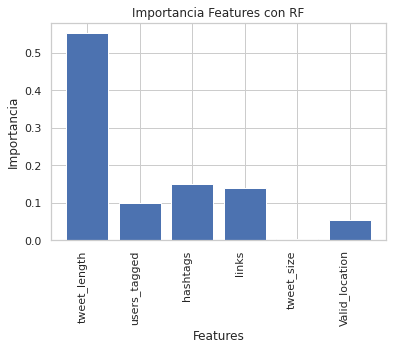

In [118]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation = 90, horizontalalignment = 'right')
plt.show()

## Word2vec

In [119]:
#!pip install gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim import models

sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],['this', 'is', 'the', 'second', 'sentence'],['yet', 'another', 'sentence'],['one', 'more', 'sentence'],['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-3.2886735e-03 -3.7468164e-04  3.5704656e-03  1.2865196e-03
  1.3573107e-03  3.5309128e-03 -4.2258953e-03  4.2415038e-03
  1.9225460e-03 -3.6578879e-03  1.4706342e-03  4.6414346e-03
 -1.5899516e-03  1.1152314e-03  2.7577009e-03  3.3677465e-03
  2.8237907e-04  4.0484220e-03 -1.2787180e-03 -7.7843980e-04
  7.0285751e-04 -2.3671889e-03  3.6365716e-04  9.9994265e-04
 -3.9744088e-03 -2.9715009e-03 -1.6804544e-03 -2.9092082e-03
  2.6158660e-03  3.4384720e-03 -3.5758852e-03 -4.9329675e-03
  2.5962482e-04  4.2808019e-03  3.4285218e-03 -9.4432582e-04
  1.0962464e-03  6.6529575e-04  3.3589182e-03 -3.9845714e-03
 -7.4832869e-04  3.5047100e-03  6.2471221e-04  3.2137563e-03
 -2.3444102e-03 -2.9314717e-03 -9.7240036e-04 -4.9958578e-03
  2.5587759e-03  4.4951350e-03 -6.7657302e-04  1.0389894e-03
  4.9218051e-03 -3.8293160e-03 -3.2553151e-0

In [120]:
sentence = [['hello', 'whats', 'up']]
model = Word2Vec(sentence, min_count = 1)
model

In [121]:
tweetsText = disastersDF.text.to_list()
sentences = [text.split() for text in tweetsText]
model = Word2Vec(sentences, min_count = 25)
print(model)
words = list(model.wv.vocab)
print(words)

Word2Vec(vocab=543, size=100, alpha=0.025)
['Our', 'are', 'the', 'of', 'this', 'us', 'all', 'Forest', 'fire', 'near', 'All', 'to', 'in', 'being', 'by', 'No', 'other', 'evacuation', 'or', 'people', 'California', 'Just', 'got', 'from', 'as', 'smoke', 'into', 'a', 'school', 'due', 'County', '-', 'rain', 'flooding', "I'm", 'on', 'top', 'and', 'I', 'can', 'see', 'an', 'emergency', 'now', 'that', 'is', 'coming', 'our', 'heat', 'so', 'far', 'getting', 'A', 'IN', "I've", 'bus', 'car', 'crash', 'up', 'love', 'My', 'What', 'Love', "can't", 'shit', 'last', 'my', 'Do', 'you', 'like', 'The', 'We', 'always', 'set', 'out', 'for', 'me', 'On', 'THE', 'much', 'around', 'new', 'but', 'they', 'will', '\x89ÛÒ', 'Two', '\x89ÛÓ', 'Police', 'Check', 'these', "you're", 'dead', 'time', 'head', 'site', '??', '????', 'with', 'But', 'not', '3', 'your', 'How', 'was', 'life', 'First', 'night', "It's", 'get', 'have', 'them', 'every', 'next', 'year', 'at', 'Man', 'before', 'home', 'years', 'has', '...', 'Black', 'In',

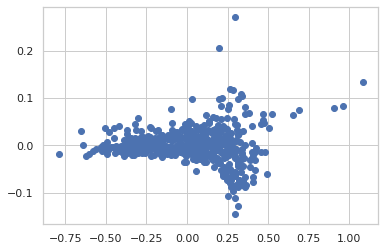

In [122]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

In [123]:
trueTweets = disastersDF[disastersDF.target == 1]
falseTweets = disastersDF[disastersDF.target == 0]

In [124]:
falseTexts = falseTweets.text.to_list()
trueTexts = trueTweets.text.to_list()
falseSentences = [text.split() for text in falseTexts]
trueSentences = [text.split() for text in trueTexts]
falseModel = Word2Vec(falseSentences, min_count = 25)
trueModel = Word2Vec(trueSentences, min_count = 25)
print(falseModel)
words = list(falseModel.wv.vocab)
print(words)

Word2Vec(vocab=242, size=100, alpha=0.025)
['up', 'I', 'love', 'is', 'My', 'car', 'so', 'What', 'a', 'this', 'No', "can't", 'that', 'shit', 'in', 'last', 'my', 'Do', 'you', 'like', 'The', 'We', 'always', 'to', 'the', 'out', 'for', 'me', 'On', 'THE', 'much', 'new', 'but', 'they', 'will', 'Check', 'these', 'on', "you're", 'and', 'an', 'time', 'head', 'of', 'us', '??', '????', 'with', 'But', 'not', '3', 'your', 'life', "It's", 'get', 'have', 'them', 'every', 'year', 'at', 'has', '...', '-', 'see', 'our', 'was', 'And', 'They', "I'm", 'be', 'if', 'know', 'by', 'In', 'about', 'would', 'their', '&amp;', 'what', 'go', "don't", 'can', 'make', 'it', 'got', "it's", 'how', 'help', 'RT', 'as', 'we', 'some', 'all', 'over', '??????', 'when', 'him', 'were', 'or', 'still', 'man', 'who', '|', 'no', 'from', 'people', 'getting', 'more', 'going', 'because', 'So', 'i', 'one', 'any', "I've", 'ever', 'been', '5', 'could', 'really', 'How', 'many', 'do', 'That', 'just', 'bloody', ':', 'face', 'only', 'God', 'ar

In [125]:
print(trueModel)
words = list(trueModel.wv.vocab)
print(words)

Word2Vec(vocab=220, size=100, alpha=0.025)
['are', 'the', 'of', 'this', 'all', 'Forest', 'fire', 'near', 'to', 'in', 'being', 'by', 'No', 'evacuation', 'or', 'people', 'California', 'got', 'from', 'as', 'into', 'a', '-', "I'm", 'on', 'and', 'I', 'can', 'an', 'emergency', 'now', 'that', 'is', 'so', 'A', 'car', 'crash', 'Two', 'Police', 'was', 'home', 'get', 'years', 'for', 'In', 'it', ':', 'fires', 'out', 'my', 'at', 'than', 'accident', 'PM', '40', 'not', 'you', 'if', 'been', 'US', 'With', 'RT', 'me', '4', 'S', '2', 'there', 'have', 'more', 'only', 'had', 'police', 'they', 'were', 'killed', 'debris', 'found', 'Reunion', 'air', 'what', 'how', 'i', 'via', 'who', 'This', '|', 'dead', 'no', 'one', 'The', "don't", 'about', 'up', 'over', '&amp;', 'two', '...', 'just', '3', '??', 'kills', 'when', 'know', 'his', 'hit', '70', 'we', 'last', 'would', 'We', 'will', 'be', "it's", 'but', 'like', 'Storm', 'Is', 'To', 'Army', 'with', 'their', 'say', 'Now', 'attack', 'Northern', 'After', 'down', 'after'

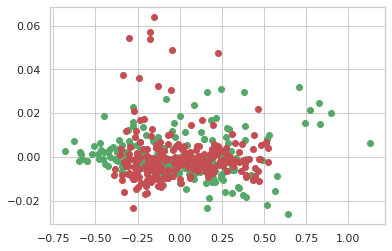

In [126]:
X = trueModel[trueModel.wv.vocab]
Y = falseModel[falseModel.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
result2 = pca.fit_transform(Y)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], c = 'g')
pyplot.scatter(result2[:, 0], result2[:, 1], c = 'r');

In [127]:
disastersDF['Total_elements'] = disastersDF.hashtags + disastersDF.users_tagged + disastersDF.links
disastersDF['links_hash'] = disastersDF.hashtags + disastersDF.links
disastersDF['links_users'] = disastersDF.users_tagged + disastersDF.links
disastersDF['hash_users'] = disastersDF.hashtags + disastersDF.users_tagged
train = disastersDF.iloc[:, 4:]
train

target  tweet_length  users_tagged  hashtags  links  tweet_size  \
0          1            69             0         1      0           5   
1          1            38             0         0      0           0   
2          1           133             0         0      0          10   
3          1            65             0         1      0           5   
4          1            88             0         2      0           5   
...      ...           ...           ...       ...    ...         ...   
7608       1            83             0         0      1           5   
7609       1           125             2         0      0          10   
7610       1            65             0         0      1           5   
7611       1           137             0         0      0          10   
7612       1            94             0         0      1           5   

      Valid_location  Total_elements  links_hash  links_users  hash_users  
0                  1               1           1            0           1  
1                  1               0           0            0           0  
2                  0               0           0            0           0  
3                  1               1           1            0           1  
4                  1               2           2            0           2  
...              ...             ...         ...          ...         ...  
7608               0               1           1            1           0  
7609               1               2           0            2           2  
7610               0               1           1            1           0  
7611               0               0           0            0           0  
7612               1               1           1            1           0  

[7613 rows x 11 columns]

In [128]:
X, y = train.iloc[:,1:], train.iloc[:,0]  #X tiene que tener todos los features distintos al target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [129]:
rf_model = RandomForestRegressor(random_state=15, n_estimators=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.568902


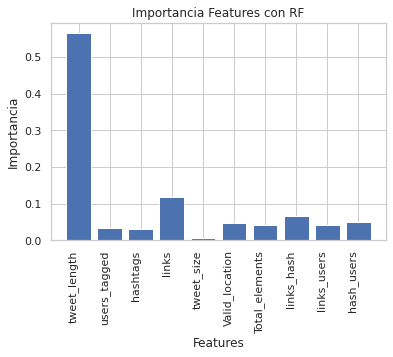

In [130]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation = 90, horizontalalignment = 'right')
plt.show()

In [131]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.597654


In [132]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
y_pred = clf.fit(X_train, y_train).predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.619236


In [133]:
falseTexts = falseTweets.text.to_list()
trueTexts = trueTweets.text.to_list()
falseSentences = [text.split() for text in falseTexts]
trueSentences = [text.split() for text in trueTexts]
falseModel = Word2Vec(falseSentences, min_count = 1)
trueModel = Word2Vec(trueSentences, min_count = 1)
print(falseModel)
words = list(falseModel.wv.vocab)
print(words)

Word2Vec(vocab=20560, size=100, alpha=0.025)
["What's", 'up', 'man?', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My', 'car', 'so', 'fast', 'What', 'a', 'goooooooaaaaaal!!!!!!', 'this', 'ridiculous....', 'London', 'cool', ';)', 'Love', 'skiing', 'wonderful', 'day!', 'LOOOOOOL', 'No', 'way...I', "can't", 'eat', 'that', 'shit', 'Was', 'in', 'NYC', 'last', 'week!', 'my', 'girlfriend', 'Cooool', ':)', 'Do', 'you', 'like', 'pasta?', 'The', 'end!', 'We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw', 'Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze', 'On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N', '@PhDSquares', '#mufc', "they've", 'built', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'doubt', 'they', 'will', 'set', 'EPL', 'season.', 'Ablaze', 'Lord', ':D', 'Check', 'these', 'out:', 'http://t.co/rOI2NSmEJJ', 'http://t.co/3Tj8ZjiN21', 'http://t.co/YDUiXEfIpE',

In [134]:
words = list(trueModel.wv.vocab)
print(words)

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada', 'All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'place', 'orders', 'expected', '13,000', 'people', 'receive', '#wildfires', 'California', 'Just', 'got', 'sent', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'pours', 'into', 'a', 'school', '#RockyFire', 'Update', '=>', 'Hwy.', '20', 'closed', 'both', 'directions', 'due', 'Lake', 'County', '-', '#CAfire', '#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'Manitou,', 'Colorado', 'Springs', 'areas', "I'm", 'on', 'top', 'hill', 'and', 'I', 'can', 'see', 'woods...', "There's", 'an', 'emergency', 'happening', 'now', 'building', 'across', 'street', 'afraid', 'that', 'tornado', 'is', 'coming', 'our', 'area...', 'Three', 'died', 'heat', 'wave'

In [135]:
'fucking' in trueModel.wv.vocab #Cosas porno, saludos, xoxo

True

In [136]:
'fucking' in falseModel.wv.vocab

True

In [137]:
def roughWords(words):
    roughWords = {'sex','sexy', 'cunt', 'dick', 'cock', 'xxx', 'porn',\
                 'lesbian', 'gay', 'masturbation', 'fap', 'asshole',\
                 'assholes', 'suck', 'sucker', 'idiot', 'stupid', 'cum',\
                 'blowjob', 'bitch', 'slut', 'sluts', 'whores', 'bitches', 'whore',\
                 'cunts', 'suckers', 'ass', 'butt', 'nude', 'nudes', 'naked', 'fucking',\
                 'xoxo', 'cocks', 'dicks', 'wtf', 'lol', 'lmfao', 'lmao', 'cunts', 'jerkface'}
    words = words.split()
    for word in words:
        word = word.lower()
        if word in roughWords:
            return 1
        if word.count('?') > 1:
            return 1
    return 0

In [138]:
disastersDF['Rough_words'] = disastersDF.text.apply(roughWords)
disastersDF.Rough_words.value_counts()

0    6886
1     727
Name: Rough_words, dtype: int64

In [139]:
train = disastersDF.iloc[:, 4:]
X, y = train.iloc[:,1:], train.iloc[:,0]  #X tiene que tener todos los features distintos al target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, train_size = 0.6, random_state=123)

In [140]:
rf_model = RandomForestRegressor(random_state=5, n_estimators=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.584608


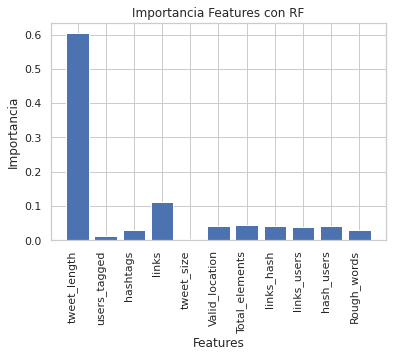

In [141]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.xticks(rotation = 90, horizontalalignment = 'right')
plt.show()

In [142]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
y_pred = clf.fit(X_train, y_train).predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.614179


In [143]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.624516


In [144]:
#Dependiendo del split que haga para el train mejora la prediccion

In [145]:
y_train.value_counts()

0    2580
1    1987
Name: target, dtype: int64

## Parte posta

In [146]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#nltk.download('wordnet')
#nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import spacy
import en_core_web_sm


In [147]:
#Features a agregar: ver si mencionan (no en forma de etiqueta) a empresas, personas, ciudades, paises
#O sea usar NER
#Aplicar todo lo escrito salvo la parte de lower para no confundir al algoritmo de NER
#Una vez que aplicas todo eso y sacas los features ahi pasas a lo del vocabulario, word2vec, etc

In [148]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

ne_tree = nltk.ne_chunk(pos_tag(nltk.word_tokenize(ex)))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/ignacio/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [149]:
nlp = en_core_web_sm.load() #Hay que instalarlo, ver link

doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [150]:
def analizeText():
    pass

In [151]:
text=" Welcome readers. I hope you find it interesting. Please do reply."
from nltk.tokenize import sent_tokenize
sent_tokenize(text)

[' Welcome readers.', 'I hope you find it interesting.', 'Please do reply.']

In [152]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text=" Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
tokenizer.tokenize(text) #Splitea por puntuacion (.)

[' Hello everyone.',
 'Hope all are fine and doing well.',
 'Hope you find the book interesting']

In [153]:
text=nltk.word_tokenize("PierreVinken, 59 years old, will join as a nonexecutive director on Nov. 29 .")
text

['PierreVinken',
 ',',
 '59',
 'years',
 'old',
 ',',
 'will',
 'join',
 'as',
 'a',
 'nonexecutive',
 'director',
 'on',
 'Nov.',
 '29',
 '.']

In [154]:
import re
import string
text=[" It is a pleasant evening.","Guests, who came from US arrived at the venue","Food was tasty."]

tokenized_docs=[nltk.word_tokenize(doc) for doc in text]
x=re.compile('[%s]' % re.escape(string.punctuation))
tokenized_docs_no_punctuation = []
for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = x.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    tokenized_docs_no_punctuation.append(new_review)
print(tokenized_docs_no_punctuation)

[['It', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']]


In [155]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
words=["Don't", 'hesitate','to','ask','questions']
[word for word in words if word.lower() not in stops]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hesitate', 'ask', 'questions']

In [156]:
import re
replacement_patterns = [
(r'won\'t', 'will not'),
(r'can\'t', 'cannot'),
(r'i\'m', 'i am'),
(r'I\'m', 'I am'),
(r'ain\'t', 'is not'),
(r'(\w+)\'ll', '\g<1> will'),
(r'(\w+)n\'t', '\g<1> not'),
(r'(\w+)\'ve', '\g<1> have'),
(r'(\w+)\'s', '\g<1> is'),
(r'(\w+)\'re', '\g<1> are'),
(r'(\w+)\'d', '\g<1> would')
]
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [157]:
replacer= RegexpReplacer()
replacer.replace("Don't hesitate to ask questions")

#replacer.replace("She must've gone to the market but she didn't go")

'Do not hesitate to ask questions'

In [158]:
from nltk.corpus import wordnet
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        
        if repl_word != word:
            return self.replace(repl_word)

        return repl_word

In [159]:
wordnet.langs()

['eng',
 'als',
 'arb',
 'bul',
 'cat',
 'cmn',
 'dan',
 'ell',
 'eus',
 'fas',
 'fin',
 'fra',
 'glg',
 'heb',
 'hrv',
 'ind',
 'ita',
 'jpn',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'qcn',
 'slv',
 'spa',
 'swe',
 'tha',
 'zsm']

In [160]:
replacer=RepeatReplacer()


In [161]:
#Bueno hasta aca tenes todas las herramientas, time to replace the text

In [162]:
def cleanTweet(tweet): #Modificado para sacar solo los links
    return ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())

In [163]:
import string
def deletePunctuation(tokenizedText):
    x = re.compile('[%s]' % re.escape(string.punctuation))
    tokenized_text_no_punctuation = []
    for token in tokenizedText: #Agarro las palabras de la lista
        newToken = x.sub(u'', token)
        if not newToken == u'':
            tokenized_text_no_punctuation.append(newToken)
    return tokenized_text_no_punctuation

In [164]:
def deleteStopwords(tokenizedText, stopwords):
    return [word for word in tokenizedText if word not in stopwords]

In [165]:
def editText(text, stopwords, replacer, repeatReplacer):
    #Primero elimino los links
    text = cleanTweet(text)
    
    #Paso a lower el text
    text = text.lower()
    
    #Reemplazo los I'm por I am
    text = replacer.replace(text)
    
    #Elimino los caracteres repetidos, ej: ohhh por oh
    words = text.split()
    text = ' '.join(repeatReplacer.replace(word) for word in words)
    
    #Tokenizo el texto
    tokenizedText = nltk.word_tokenize(text)
    
    #Elimno los signos de puntuacion
    tokenizedText = deletePunctuation(tokenizedText)
    
    #Elimino los stopwords
    tokenizedText = deleteStopwords(tokenizedText, stopwords)
    
    editText = ' '.join(tokenizedText)
    return editText

In [166]:
repeatReplacer = RepeatReplacer()
replacer = RegexpReplacer()
stop = set(stopwords.words('english'))

disastersDF['text'] = disastersDF.text.apply(editText, args = (stop, replacer, repeatReplacer))
disastersDF

id          keyword    location  \
0         1       earthquake          us   
1         4             fire          la   
2         5       evacuation     unknown   
3         6       evacuation  california   
4         7            smoke      alaska   
...     ...              ...         ...   
7608  10869  bridge collapse     unknown   
7609  10870         wildfire  california   
7610  10871          volcano     unknown   
7611  10872           police     unknown   
7612  10873         wildfire  california   

                                                   text  target  tweet_length  \
0          deeds reason earthquake may allah forgive us       1            69   
1                 forest fire near la ronge sask canada       1            38   
2     residents asked shelter place notified oficers...       1           133   
3     130 people receive wildfires evacuation orders...       1            65   
4     got sent photo ruby alaska smoke wildfires pou...       1            88   
...                                                 ...     ...           ...   
7608  two giant cranes holding bridge collapse nearb...       1            83   
7609  ariaahrary thetawniest control wild fires cali...       1           125   
7610                    m194 0104 utc 5km volcano hawai       1            65   
7611  police investigating ebike collided car little...       1           137   
7612  latest homes razed northern california wildfir...       1            94   

      users_tagged  hashtags  links  tweet_size  Valid_location  \
0                0         1      0           5               1   
1                0         0      0           0               1   
2                0         0      0          10               0   
3                0         1      0           5               1   
4                0         2      0           5               1   
...            ...       ...    ...         ...             ...   
7608             0         0      1           5               0   
7609             2         0      0          10               1   
7610             0         0      1           5               0   
7611             0         0      0          10               0   
7612             0         0      1           5               1   

      Total_elements  links_hash  links_users  hash_users  Rough_words  
0                  1           1            0           1            0  
1                  0           0            0           0            0  
2                  0           0            0           0            0  
3                  1           1            0           1            0  
4                  2           2            0           2            0  
...              ...         ...          ...         ...          ...  
7608               1           1            1           0            0  
7609               2           0            2           2            0  
7610               1           1            1           0            0  
7611               0           0            0           0            0  
7612               1           1            1           0            0  

[7613 rows x 16 columns]

In [167]:
disastersDF.loc[0].text

'deeds reason earthquake may allah forgive us'

In [168]:
naturalDisastersDF.loc[0].text

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [169]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r